# **Project Final Deep Learning**
1. Annisa Zhafirah - 2115061038
2. M.Rafi Rizanda - 2115061098

**Data Understanding***

Dataset yang digunakan adalah Indeks Standar Pencemar Udara di Provinsi Bandar Lampung Tahun Januari 2022- Januari 2024. Dataset ini memiliki 17.076 baris dan 11 kolom sebelum  di cleaning yang berisi mengenai Indeks Standar Pencemar Udara (ISPU) di Provinsi Bandar Lampung. Setelah dilakukan cleaning pada data meuat 108 baris data dan 10 kolom, dengan rincian kolom sebagai berikut: 

1. Datetime: 16 Januari 2022 s/d 4 Februari 2024
2. PM10: Partikel udara yang berukuran lebih kecil dari 10 mikron
3. PM25: Partikel halus di udara yang ukurannya 2.5 mikron
4. SO2: Sulfur dioksida
5. CO: Karbon monoksida
6. O3: Ozon
7. NO2: Nitrogen dioksida
8. AQI: Air Quality Index
9. ts: Timestamp
10. kualitas_udara: Kategori kualitas udara dari AQI

In [35]:
#MEMBACA DATABDL.CSV

import pandas as pd

# Load the data
df = pd.read_csv('dataBDL.csv')

# Inspect the first few rows of the datetime column
print(df['datetime'].head())

0    2022-01-12:17
1    2022-01-12:18
2    2022-01-12:19
3    2022-01-12:20
4    2022-01-12:21
Name: datetime, dtype: object


In [42]:
#MENGUBAH FORMAT DATETIME,CLEANING, DAN MENG-AVERAGE DATA DARI HARIAN KE MINGGUAN

import pandas as pd

# Load the data
df = pd.read_csv('dataBDL.csv')

# Print the first few rows of the DataFrame to inspect the columns
print("Initial DataFrame:\n", df.head())

# Define a function to clean the datetime strings
def clean_datetime(datetime_str):
    # Try parsing the datetime string with known formats
    for fmt in ("%Y-%m-%d %H:%M:%S", "%Y-%m-%d %H:%M", "%Y-%m-%d %H", "%Y-%m-%d", "%Y-%m-%d:%H"):
        try:
            return pd.to_datetime(datetime_str, format=fmt, errors='raise')
        except ValueError:
            continue
    # If no format matches, return NaT (Not a Time)
    return pd.NaT

# Ensure the 'datetime' column exists before trying to clean it
if 'datetime' in df.columns:
    # Apply the function to the datetime column
    df['datetime'] = df['datetime'].apply(clean_datetime)

    # Check if there are any unparsed dates
    unparsed_dates = df['datetime'].isna().sum()
    if unparsed_dates > 0:
        print(f"There are {unparsed_dates} unparsed datetime values. Dropping these rows.")

    # Drop rows with NaT values in the datetime column
    df = df.dropna(subset=['datetime'])

    # Convert datetime column to the index
    df.set_index('datetime', inplace=True)

    # Print the DataFrame to ensure the index is set correctly
    print("DataFrame with datetime index:\n", df.head())

    # Ensure only numeric columns are included in the resampling
    numeric_df = df.select_dtypes(include='number')

    # Resample the data on a weekly basis and calculate the mean
    df_weekly = numeric_df.resample('W').mean()

    # Inspect the resulting DataFrame
    print("Weekly resampled DataFrame:\n", df_weekly.head())

    # Save the resulting DataFrame to a new CSV file
    df_weekly.to_csv('weeklydataBDL.csv')
    print("Weekly resampled data saved to 'weeklydataBDL.csv'")
else:
    print("Error: 'datetime' column not found in the DataFrame.")


Initial DataFrame:
         datetime    AQI     CO  NO2    O3  PM10   PM25   SO2  \
0  2022-01-12:17  141.0  290.0  5.3  30.0  71.7  50.67  55.0   
1  2022-01-12:18  150.0  319.0  6.3  27.0  76.0  54.00  62.0   
2  2022-01-12:19  150.0  328.0  7.3  26.0  76.3  54.00  57.3   
3  2022-01-12:20  150.0  329.0  8.3  25.0  76.7  54.00  52.7   
4  2022-01-12:21  150.0  330.0  9.3  24.0  77.0  54.00  48.0   

       timestamp_local        timestamp_utc          ts  
0  2022-01-13T00:00:00  2022-01-12T17:00:00  1644685200  
1  2022-01-13T01:00:00  2022-01-12T18:00:00  1644681600  
2  2022-01-13T02:00:00  2022-01-12T19:00:00  1644678000  
3  2022-01-13T03:00:00  2022-01-12T20:00:00  1644674400  
4  2022-01-13T04:00:00  2022-01-12T21:00:00  1644670800  
DataFrame with datetime index:
                        AQI     CO  NO2    O3  PM10   PM25   SO2  \
datetime                                                          
2022-01-12 17:00:00  141.0  290.0  5.3  30.0  71.7  50.67  55.0   
2022-01-12 18:

In [43]:
#MEMBERSIHKAN/CLEANING DATA WEEKLYBDL MENJADI INTEGER

import pandas as pd
import numpy as np

# Load the resampled weekly data
df_weekly = pd.read_csv('weeklydataBDL.csv')

# Print the first few rows of the DataFrame to inspect the columns
print("Weekly DataFrame:\n", df_weekly.head())

# List of columns to convert to integer
columns_to_convert = ['AQI', 'CO', 'NO2', 'O3', 'PM10', 'PM25', 'SO2', 'ts']

# Function to clean and convert columns to integer
def clean_and_convert_to_int(df, columns):
    for col in columns:
        # Replace NaN values with a default value (e.g., 0) or you can use other methods like interpolation
        df[col] = df[col].replace(np.nan, 0)
        
        # Convert the column to integer type
        df[col] = df[col].astype(int)
    
    return df

# Apply the function to the DataFrame
df_weekly = clean_and_convert_to_int(df_weekly, columns_to_convert)

# Print the DataFrame to check the conversion
print("Cleaned and converted DataFrame:\n", df_weekly.head())

# Save the cleaned DataFrame to a new CSV file
df_weekly.to_csv('cleaned_weeklydataBDL.csv', index=False)
print("Cleaned weekly resampled data saved to 'cleaned_weeklydataBDL.csv'")

Weekly DataFrame:
      datetime         AQI          CO        NO2         O3       PM10  \
0  2022-01-16  105.544554  211.783168  11.268317  55.399010  52.274257   
1  2022-01-23   96.640244  181.779878   8.825000  58.231707  47.060976   
2  2022-01-30   96.107784  161.353293   8.721557  54.712575  46.628743   
3  2022-02-06   91.023810  162.500000   7.807738  55.011905  43.547619   
4  2022-02-13  100.050725  187.092029  10.341304  50.060145  48.613768   

        PM25        SO2            ts  
0  36.231089  28.888119  1.644502e+09  
1  32.920732  23.621951  1.644015e+09  
2  32.700599  22.910180  1.643410e+09  
3  30.625000  19.386905  1.642804e+09  
4  34.243986  24.434783  1.642542e+09  
Cleaned and converted DataFrame:
      datetime  AQI   CO  NO2  O3  PM10  PM25  SO2          ts
0  2022-01-16  105  211   11  55    52    36   28  1644501849
1  2022-01-23   96  181    8  58    47    32   23  1644014853
2  2022-01-30   96  161    8  54    46    32   22  1643410304
3  2022-02-06 

In [ ]:
#MENAMBAHKAN KATEGORI KUALITAS UDARA BERDASARKAN NILAI AQI MINGGUAN

import pandas as pd

# Load the cleaned weekly data
df_weekly = pd.read_csv('cleaned_weeklydataBDL.csv')

# Print the first few rows of the DataFrame to inspect the columns
print("Cleaned Weekly DataFrame:\n", df_weekly.head())

# Define a function to categorize air quality based on AQI
def categorize_air_quality(aqi):
    if aqi <= 50:
        return 'baik'
    elif 50 < aqi <= 100:
        return 'sedang'
    else:
        return 'buruk'

# Apply the function to create a new column 'kualitas udara'
df_weekly['kualitas udara'] = df_weekly['AQI'].apply(categorize_air_quality)

# Print the DataFrame to check the new column
print("DataFrame with Air Quality Category:\n", df_weekly.head())

# Save the modified DataFrame to a new CSV file
df_weekly.to_csv('kategori_weeklydataBDL.csv', index=False)
print("Categorized weekly data saved to 'categorized_weeklydataBDL.csv'")

C:\Users\lenov\AppData\Local\Temp\ipykernel_22576\2749149264.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].mean(), inplace=True)


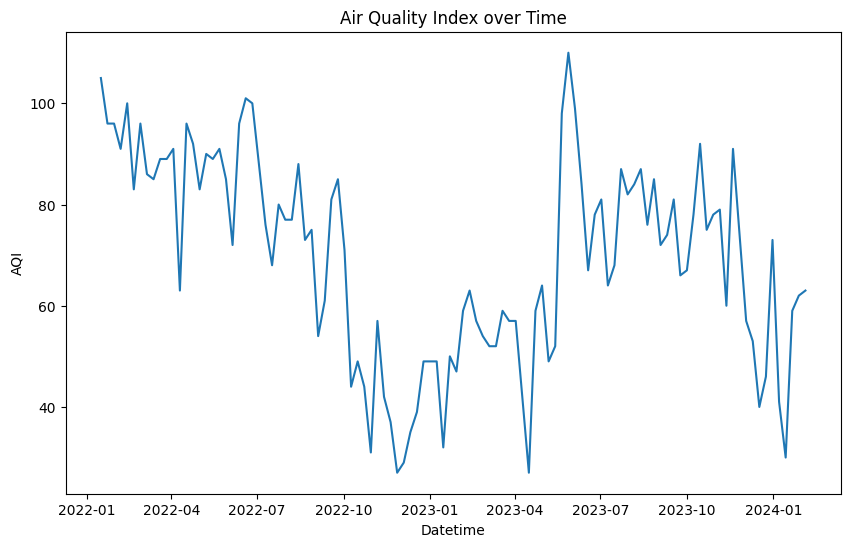

In [5]:
#STATISTIK VARIABEL AQI

import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('kategori_weeklydataBDL.csv')

# Check for missing values
missing_values = data.isnull().sum()

# List of columns to fill missing values
columns_to_fill = ['AQI', 'CO', 'NO2', 'O3', 'PM10', 'PM25']

# Fill missing values with mean for the specified columns
for column in columns_to_fill:
    data[column].fillna(data[column].mean(), inplace=True)

# Get basic statistical details
data.describe()

# Convert 'datetime' column to datetime format
data['datetime'] = pd.to_datetime(data['datetime'], format='%Y-%m-%d') 

# Set 'datetime' as index
data.set_index('datetime', inplace=True)

# Plot 'AQI' over time
plt.figure(figsize=(10,6))
plt.plot(data['AQI'])
plt.title('Air Quality Index over Time')
plt.xlabel('Datetime')
plt.ylabel('AQI')
plt.show()

Categorized Weekly DataFrame:
             AQI   CO  NO2  O3  PM10  PM25  SO2          ts kualitas udara
datetime                                                                 
2022-01-16  105  211   11  55    52    36   28  1644501849          buruk
2022-01-23   96  181    8  58    47    32   23  1644014853         sedang
2022-01-30   96  161    8  54    46    32   22  1643410304         sedang
2022-02-06   91  162    7  55    43    30   19  1642804200         sedang
2022-02-13  100  187   10  50    48    34   24  1642541582         sedang


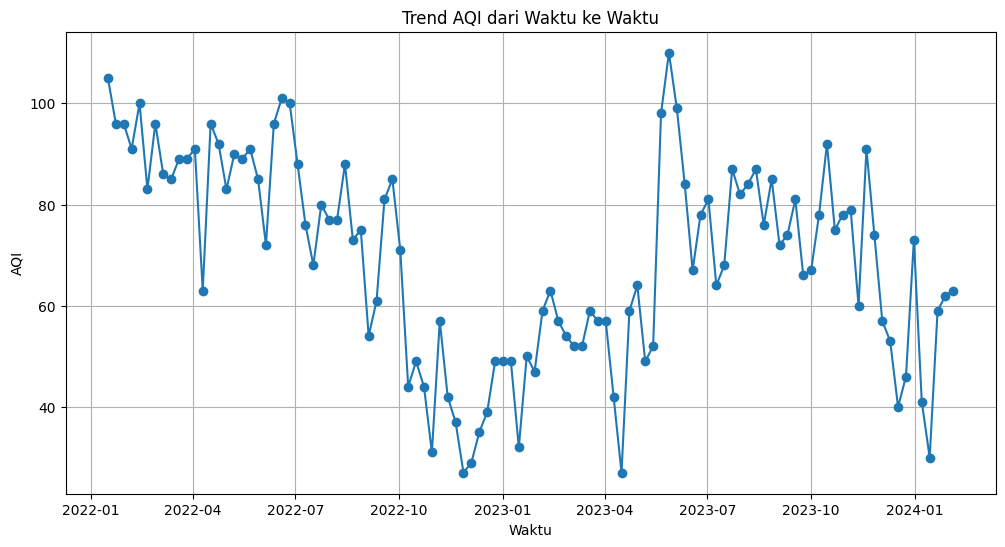

In [7]:
#STATISTIK VARIABEL AQI

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the categorized weekly data
df = pd.read_csv('kategori_weeklydataBDL.csv')

# Convert 'datetime' column to datetime type
df['datetime'] = pd.to_datetime(df['datetime'])

# Set the 'datetime' column as index
df.set_index('datetime', inplace=True)

# Print the first few rows of the DataFrame
print("Categorized Weekly DataFrame:\n", df.head())

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['AQI'], marker='o', linestyle='-')
plt.title('Trend AQI dari Waktu ke Waktu')
plt.xlabel('Waktu')
plt.ylabel('AQI')
plt.grid(True)
plt.show()

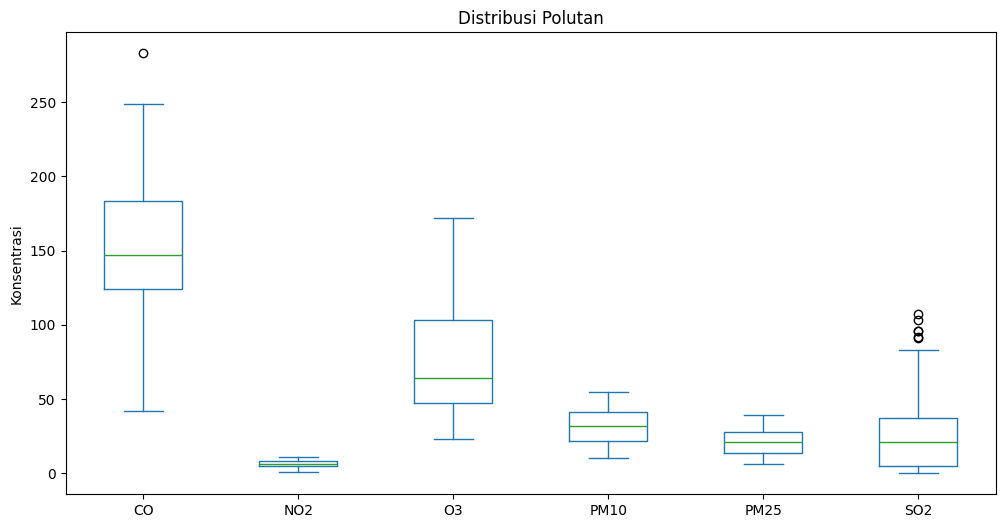

In [8]:
#DISTRIBUSI KONSENTRASI POLUTAN YANG ADA

pollutants = ['CO', 'NO2', 'O3', 'PM10', 'PM25', 'SO2']
df[pollutants].plot(kind='box', figsize=(12, 6)) 
plt.title('Distribusi Polutan')
plt.ylabel('Konsentrasi')
plt.show()

C:\Users\lenov\AppData\Local\Temp\ipykernel_22576\602927857.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='kualitas udara', palette='viridis')


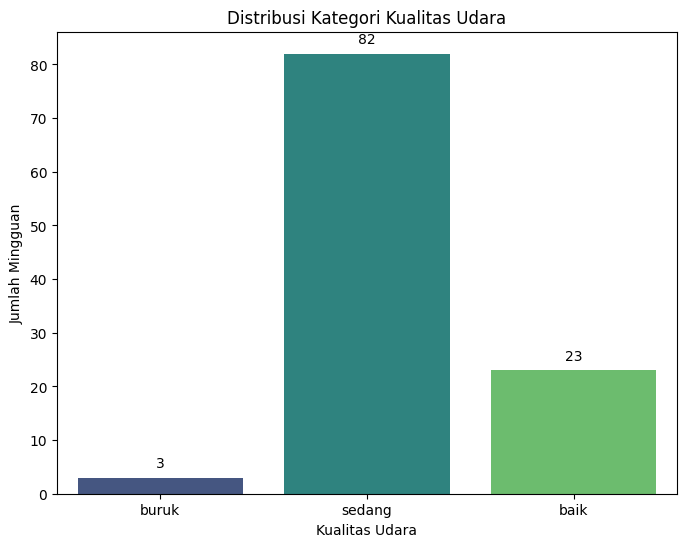

In [21]:
#DISTRIBUSI KATEGORI KUALITAS UDARA

# Plot the countplot with annotations
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='kualitas udara', palette='viridis')

# Add total counts on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

plt.title('Distribusi Kategori Kualitas Udara')
plt.xlabel('Kualitas Udara')
plt.ylabel('Jumlah Mingguan')
plt.show()

In [3]:
pip install prophet #Modul untuk forecasting dengan prophet

  Using cached holidays-0.51-py3-none-any.whl.metadata (23 kB)
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/13.3 MB 660.6 kB/s eta 0:00:21
   ---------------------------------------- 0.1/13.3 MB 919.0 kB/s eta 0:00:15
   ---------------------------------------- 0.1/13.3 MB 1.2 MB/s eta 0:00:11
    --------------------------------------- 0.2/13.3 MB 1.6 MB/s eta 0:00:09
    --------------------------------------- 0.2/13.3 MB 1.6 MB/s eta 0:00:09
    --------------------------------------- 0.2/13.3 MB 1.6 MB/s eta 0:00:09
   - -------------------------------------- 0.3/13.3 MB 1.2 MB/s eta 0:00:12
   - -------------------------------------- 0.4/13.3 MB 1.2 MB/s eta 0:00:11
   - -------------------------------------- 0.5/13.3 MB 1.2 MB/s eta 0:00:11
   - -------------------------------------- 0.6/13.3 MB 1.3 MB/s eta 0:00:10
   -- ------------------------------------- 0.7/13.3 MB 1.4 MB/s eta 0:00:10
   -- ----------

02:09:12 - cmdstanpy - INFO - Chain [1] start processing
02:09:12 - cmdstanpy - INFO - Chain [1] done processing


          ds       yhat  yhat_lower  yhat_upper
0 2022-01-16  75.855903   61.185983   90.257325
1 2022-01-23  79.768431   65.402363   93.604845
2 2022-01-30  87.468441   73.462773  101.732210
3 2022-02-06  92.745135   78.649783  107.119035
4 2022-02-13  91.506774   76.532678  106.089376


C:\Python312\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Python312\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


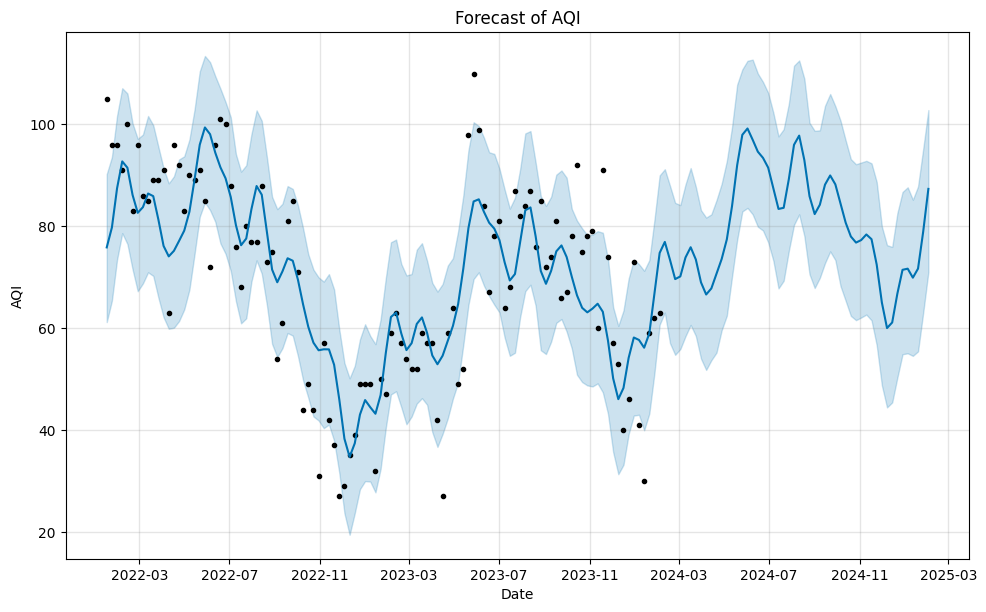

In [4]:
#FORECASTING VARIABEL AQI DENGAN PROPHET

import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt  # Import matplotlib.pyplot

# Load your DataFrame from CSV or any other source
df = pd.read_csv('kategori_weeklydataBDL.csv')

# Assuming 'datetime' is a column in your DataFrame
# Prepare the data for Prophet
df_prophet = df[['datetime', 'AQI']].reset_index(drop=True).rename(columns={'datetime': 'ds', 'AQI': 'y'})

# Initialize Prophet model
model = Prophet()

# Fit the model
model.fit(df_prophet)

# Create a future dataframe for forecasting
future = model.make_future_dataframe(periods=52, freq='W')

# Forecasting
forecast = model.predict(future)

# Print the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

#Keterangan Dataframenya
#ds: Kolom ini berisi tanggal atau timestamp yang dihasilkan oleh model Prophet.
#yhat: Kolom ini berisi nilai prediksi utama (predicted value) dari model Prophet untuk setiap waktu ds.
#yhat_lower dan yhat_upper: Kolom-kolom ini menunjukkan rentang (confidence interval) dari prediksi. 
#yhat_lower adalah nilai terendah dari prediksi
#yhat_upper adalah nilai tertinggi dari prediksi.

# Plot the forecast
fig = model.plot(forecast)
plt.title('Forecast of AQI')  
plt.xlabel('Date')
plt.ylabel('AQI')
plt.show() 

# Save the forecast to a CSV file
forecast.to_csv('forecasted_AQI.csv', index=False)

# **Kesimpulan**

Berdasarkan hasil forecast AQI menggunakan model Prophet, dapat disimpulkan bahwa kualitas udara di kota Bandar Lampung (diasumsikan dari data yang digunakan) diperkirakan akan mengalami fluktuasi dalam periode satu tahun ke depan. Fluktuasi artinya akan terjadi perubahan kenaikan khusus AQI yang disebabkan oleh faktor polutan udara, yang perubahannya berupa kenaikan maupun penurunan nilai AQI itu sendiri.Prediksi ini memberikan gambaran bahwa nilai rata-rata AQI (Air Quality Index) dapat naik dan turun secara periodik tertentu. Dengan adanya informasi ini, pihak terkait dapat mempersiapkan langkah-langkah mitigasi atau perbaikan kualitas udara yang tepat untuk menghadapi variasi yang diperkirakan akan terjadi di masa mendatang. Prediksi ini juga dapat digunakan sebagai dasar untuk perencanaan kegiatan masyarakat atau kebijakan publik yang bertujuan untuk meminimalkan dampak negatif dari kualitas udara yang buruk pada kesehatan dan lingkungan.